# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.120878e+01     6.828468e+00
 * time: 0.0045130252838134766
     1     2.758662e+01     5.173097e+00
 * time: 0.012639999389648438
     2     2.544723e+01     7.876315e+00
 * time: 0.038674116134643555
     3     1.489854e+01     3.512888e+00
 * time: 0.07025408744812012
     4     1.163369e+01     1.357340e+00
 * time: 0.0916450023651123
     5     1.058248e+01     1.203219e+00
 * time: 0.11634993553161621
     6     1.004354e+01     1.502915e+00
 * time: 0.13187909126281738
     7     9.559523e+00     1.004281e+00
 * time: 0.14756107330322266
     8     9.378575e+00     5.937274e-01
 * time: 0.16263604164123535
     9     9.186277e+00     6.240408e-01
 * time: 0.17833209037780762
    10     9.038981e+00     8.487281e-01
 * time: 0.1939849853515625
    11     8.886919e+00     7.388184e-01
 * time: 0.21004199981689453
    12     8.776940e+00     5.497245e-01
 * time: 0.22214889526367188
    13     8.702945e+00     4.540118e-01
 * tim

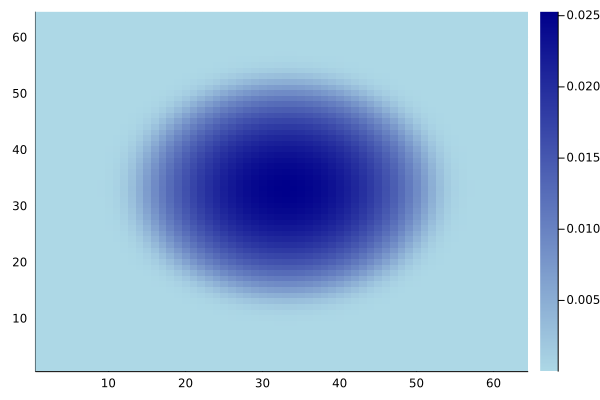

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)